# Exploring Divvy Bike Dataset

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Load 2023 Quater 1 Divvy Bike Dataset

### Numerical Summary 

In [2]:
df1 = pd.read_csv("datasets/202301-divvy-tripdata.csv", parse_dates=["started_at", "ended_at"])
df2 = pd.read_csv("datasets/202302-divvy-tripdata.csv", parse_dates=["started_at", "ended_at"])
df3 = pd.read_csv("datasets/202303-divvy-tripdata.csv", parse_dates=["started_at", "ended_at"])
df = pd.concat([df1, df2, df3])
df.dropna(inplace=True)

In [6]:
#The number of start stations
print("The number of start stations is " + str(df.start_station_name.nunique()))
#The number of end stations
print("The number of end stations is " + str(df.end_station_name.nunique()))


The number of start stations is 1039
The number of end stations is 1058


In [7]:
#The number of bikes that start at start stations
df.start_station_name.value_counts()

Ellis Ave & 60th St                       5305
University Ave & 57th St                  5236
Clinton St & Washington Blvd              4925
Kingsbury St & Kinzie St                  4599
Clark St & Elm St                         4132
                                          ... 
Public Rack - Peoria St & 60th St            1
Kildare & Cermak                             1
Public Rack - Christiana Ave & 55th St       1
Public Rack - Pulaski & 52nd                 1
Public Rack - Nordica Ave & Addison St       1
Name: start_station_name, Length: 1039, dtype: int64

In [8]:
#The number of bikes that ends at start stations
df.end_station_name.value_counts()

University Ave & 57th St                      5291
Ellis Ave & 60th St                           5222
Clinton St & Washington Blvd                  5170
Kingsbury St & Kinzie St                      4551
Clark St & Elm St                             4057
                                              ... 
Public Rack - Emerald Ave & 43rd St              1
Public Rack - Cottage Grove Ave & 111th St       1
Public Rack - Peoria St & 60th St                1
Public Rack - Oglesby Ave & 95th St              1
Public Rack - Laramie Ave & Fullerton Ave        1
Name: end_station_name, Length: 1058, dtype: int64

In [21]:
#The users are either "members" or "casual" users
member_data = df[df['member_casual'] == 'member']
casual_data = df[df['member_casual'] == 'casual']

In [23]:
print("The number of bikes that are checked out by members are " + str(member_data.shape[0]) + " in the first quater of 2023.")
print("The number of bikes that are checked out by casual users are " + str(member_data.shape[0]) + " in the first quater of 2023.")


The number of bikes that are checked out by members are 389102 in the first quater of 2023.
The number of bikes that are checked out by casual users are 389102 in the first quater of 2023.


The following plots shows the longitude and latitude of start locations and end locations of divvy bikes in Chicago. 

Text(0.5, 1.0, 'Start location')

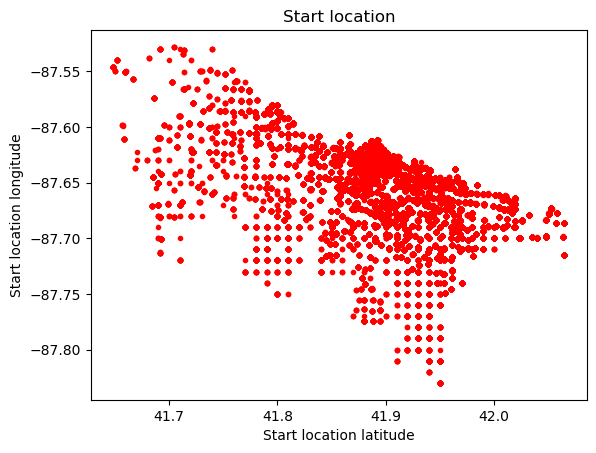

In [25]:
# start stations' locations
plt.scatter(df['start_lat'], df['start_lng'],c='r', marker='.')
plt.xlabel('Start location latitude')
plt.ylabel('Start location longitude')
plt.title('Start location')

Text(0.5, 1.0, 'End location')

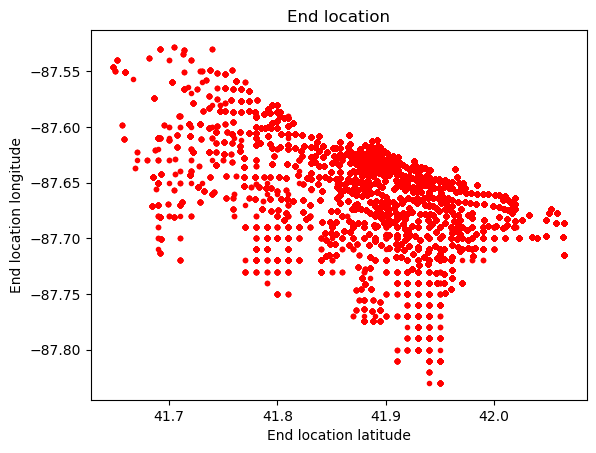

In [28]:
#end stations' locations
plt.scatter(df['end_lat'], df['end_lng'],c='r', marker='.')
plt.xlabel('End location latitude')
plt.ylabel('End location longitude')
plt.title('End location')

### Popular Routes 

In [10]:
# Group the dataset by start and end stations and count the number of trips
route_counts = df.groupby(["start_station_name", "end_station_name"]).size().reset_index(name="trip_count")

# Sort the routes by trip count in descending order
route_counts.sort_values("trip_count", ascending=False, inplace=True)

# Get the most popular route
most_popular_route = route_counts.iloc[0]

# Print the most popular route
print(f"The most popular route is from {most_popular_route['start_station_name']} to {most_popular_route['end_station_name']}, with {most_popular_route['trip_count']} trips.")


The most popular route is from Ellis Ave & 60th St to University Ave & 57th St, with 2022 trips.


In [11]:
route_counts.head(10)

,start_station_name,end_station_name,trip_count
22769,Ellis Ave & 60th St,University Ave & 57th St,2022
58222,University Ave & 57th St,Ellis Ave & 60th St,1921
22739,Ellis Ave & 60th St,Ellis Ave & 55th St,1760
22648,Ellis Ave & 55th St,Ellis Ave & 60th St,1660
37466,Loomis St & Lexington St,Morgan St & Polk St,832
6978,Calumet Ave & 33rd St,State St & 33rd St,829
55432,State St & 33rd St,Calumet Ave & 33rd St,822
42402,Morgan St & Polk St,Loomis St & Lexington St,683
58231,University Ave & 57th St,Kimbark Ave & 53rd St,639
31183,Kimbark Ave & 53rd St,University Ave & 57th St,608


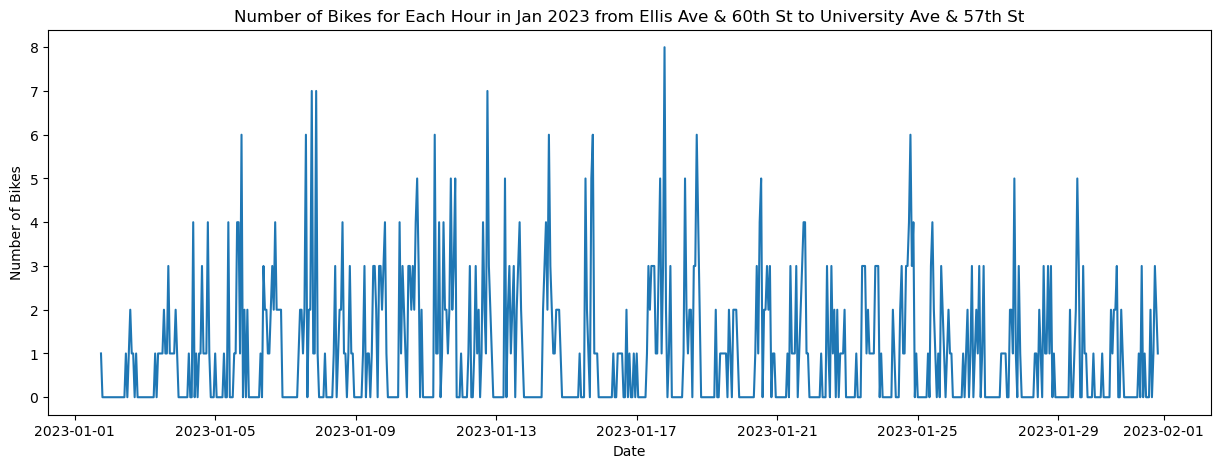

In [13]:
#visualize the most popular route (from Ellis Ave & 60th St to University Ave & 57th St) in Jan 2023.
# Filter the dataset by start and end stations
start_station = "Ellis Ave & 60th St"
end_station = "University Ave & 57th St"
sub_df = df1[(df1["start_station_name"] == start_station) & (df1["end_station_name"] == end_station)]

# Convert the "started_at" column to a datetime object and set it as the index
sub_df["started_at"] = pd.to_datetime(sub_df["started_at"])
sub_df.set_index("started_at", inplace=True)

# Resample the data to get the number of check-outs for each hour for each day
bike_counts = sub_df.resample("H")["start_station_name"].count()

# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(bike_counts.index, bike_counts.values)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Bikes")
ax.set_title("Number of Bikes for Each Hour in Jan 2023 from {} to {}".format(start_station, end_station))
plt.show()


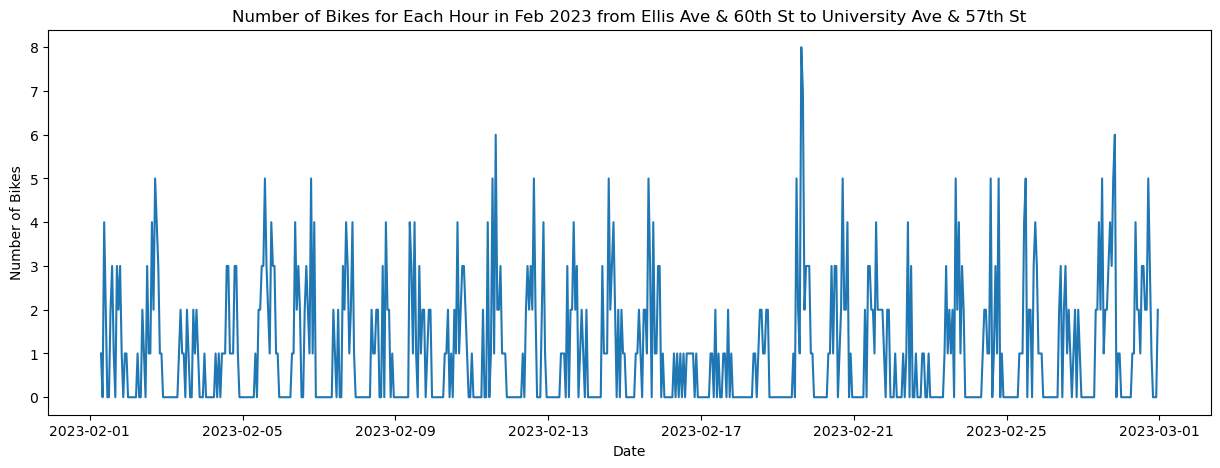

In [14]:
#visualize the most popular route (from Ellis Ave & 60th St to University Ave & 57th St) in Feb 2023.
# Filter the dataset by start and end stations
start_station = "Ellis Ave & 60th St"
end_station = "University Ave & 57th St"
sub_df = df2[(df2["start_station_name"] == start_station) & (df2["end_station_name"] == end_station)]

# Convert the "started_at" column to a datetime object and set it as the index
sub_df["started_at"] = pd.to_datetime(sub_df["started_at"])
sub_df.set_index("started_at", inplace=True)

# Resample the data to get the number of check-outs for each hour for each day
bike_counts = sub_df.resample("H")["start_station_name"].count()

# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(bike_counts.index, bike_counts.values)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Bikes")
ax.set_title("Number of Bikes for Each Hour in Feb 2023 from {} to {}".format(start_station, end_station))
plt.show()

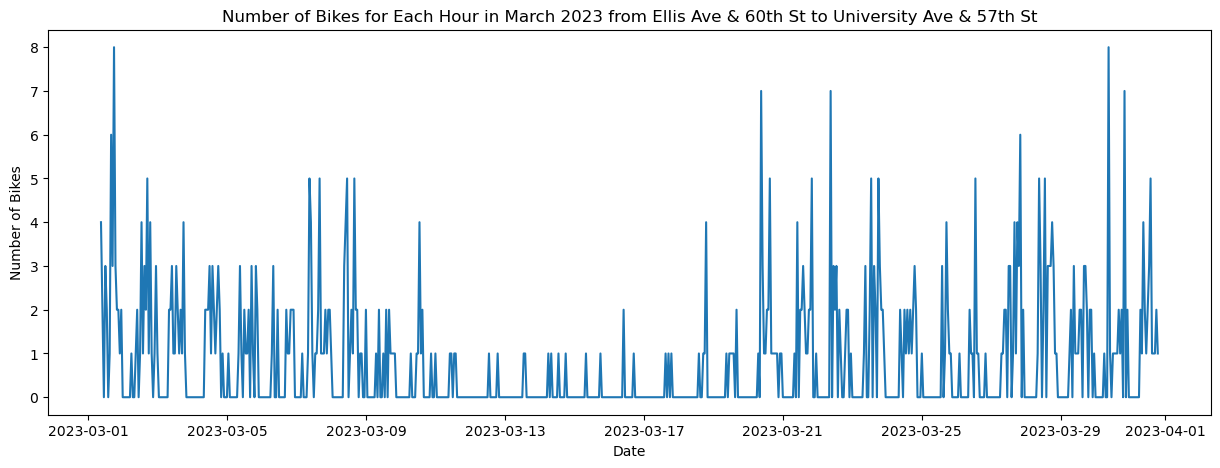

In [15]:
#visualize the most popular route (from Ellis Ave & 60th St to University Ave & 57th St) in March 2023.
# Filter the dataset by start and end stations
start_station = "Ellis Ave & 60th St"
end_station = "University Ave & 57th St"
sub_df = df3[(df3["start_station_name"] == start_station) & (df3["end_station_name"] == end_station)]

# Convert the "started_at" column to a datetime object and set it as the index
sub_df["started_at"] = pd.to_datetime(sub_df["started_at"])
sub_df.set_index("started_at", inplace=True)

# Resample the data to get the number of check-outs for each hour for each day
bike_counts = sub_df.resample("H")["start_station_name"].count()

# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(bike_counts.index, bike_counts.values)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Bikes")
ax.set_title("Number of Bikes for Each Hour in March 2023 from {} to {}".format(start_station, end_station))
plt.show()

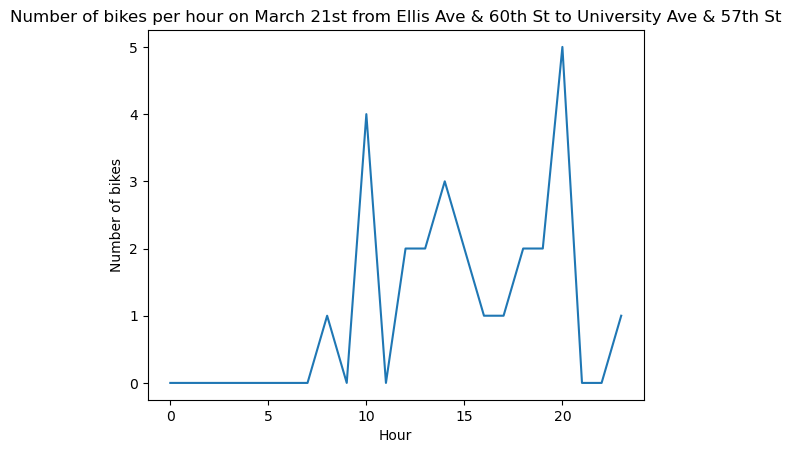

In [19]:
#visualize the most popular route (from Ellis Ave & 60th St to University Ave & 57th St) on a specific day: March 21st

# Filter for trips starting from Ellis Ave & 60th St and ending at University Ave & 57th St
start_station = 'Ellis Ave & 60th St'
end_station = 'University Ave & 57th St'
mask = (df['start_station_name'] == start_station) & (df['end_station_name'] == end_station)
trips = df[mask].copy()

# Convert started_at to datetime and set as index
trips['started_at'] = pd.to_datetime(trips['started_at'])
trips.set_index('started_at', inplace=True)

# Resample trips to hourly frequency
trips_hourly = trips.resample('H').count()

# Filter for March 15th
trips_hourly_15th = trips_hourly.loc['2023-03-21']

# Plot the number of bikes for each hour on March 15th
plt.plot(trips_hourly_15th.index.hour, trips_hourly_15th['ride_id'])
plt.xlabel('Hour')
plt.ylabel('Number of bikes')
plt.title(f'Number of bikes per hour on March 21st from {start_station} to {end_station}')
plt.show()

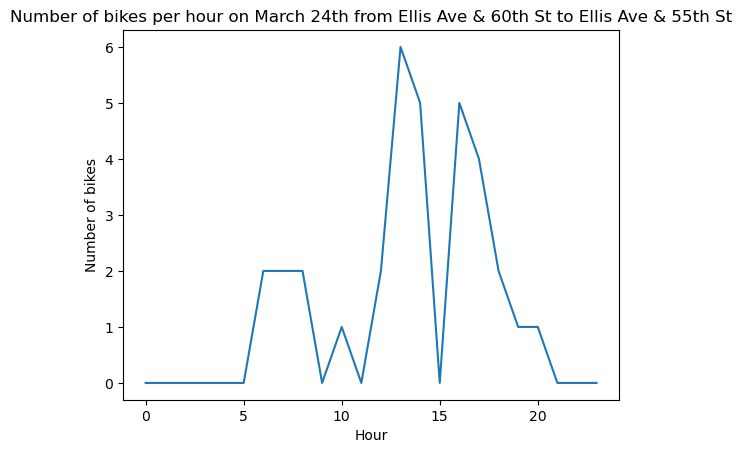

In [20]:
#visualize another popular route (from Ellis Ave & 60th St to Ellis Ave & 55th St) on March 24th
# Filter for trips starting from Ellis Ave & 60th St and ending at Ellis Ave & 55th St
start_station = 'Ellis Ave & 60th St'
end_station = 'Ellis Ave & 55th St'
mask = (df['start_station_name'] == start_station) & (df['end_station_name'] == end_station)
trips = df[mask].copy()

# Convert started_at to datetime and set as index
trips['started_at'] = pd.to_datetime(trips['started_at'])
trips.set_index('started_at', inplace=True)

# Resample trips to hourly frequency
trips_hourly = trips.resample('H').count()

# Filter for March 15th
trips_hourly_15th = trips_hourly.loc['2023-03-24']

# Plot the number of bikes for each hour on March 15th
plt.plot(trips_hourly_15th.index.hour, trips_hourly_15th['ride_id'])
plt.xlabel('Hour')
plt.ylabel('Number of bikes')
plt.title(f'Number of bikes per hour on March 24th from {start_station} to {end_station}')
plt.show()

Observations: 

- The most popular route is from Ellis Ave & 60th St station to University Ave & 57th St station. The maximum number of bikes running in this route in an hour is 8, and the minimum number of bikes running in this route is 0. On average, the number of bikes running in this routes in January and Februray is more than that in March.
- On March 21st, 10:00, 15:00, and 20:00 are the three hours that has relatively large number of bikes running on this most popular route from Ellis Ave & 60th St station to University Ave & 57th St station.
- Another popular route is from Ellis Ave & 60th St to Ellis Ave & 55th St. Visualizing the number of bikes running between the two stations on March 24th, I found that 7:00 to 8:00, 12:00, 17:00, and 18:00 have relatively large number of bikes.
- Similarly, for other pairs of stations, I observed the similar pattern that during rush hours, which are typically between 7:00 and 9:00 and between 17:00 and 19:00, the number of bikes checked out is larger than that of other time periods.